# Parameters

In [19]:

x = [50 , 3, 9, 22, 39, 30, 66, 72, 88, 80, 97]
y = [24, 27, 7, 23, 8, 50, 6, 48, 6, 26, 49]

q1 = [0, 0.74, 1, 0.68, 0.78, 0.50, 0.25, 0.80, 1, 0.90, 0.40]
q2 = [0, 0.70, 0.95, 0.65, 0.75, 0.45, 0.20, 0.75, 0.95, 0.85, 0.35]
q3 = [0, 0.65, 0.90, 0.60, 0.70, 0.40, 0.15, 0.70, 0.90, 0.80, 0.30]
q4 = [0, 0.60, 0.85, 0.55, 0.65, 0.35, 0.10, 0.65, 0.85, 0.75, 0.25]
Pr = [0.2, 0.4, 0.15, 0.25]

t = [0.0, 1.6, 2.5, 0.6, 0.7, 0.3, 0.4, 0.4, 0.3, 0.5, 0.2]
MAT = [0, 1, 1.5, 1, 2, 4, 1, 2.5, 3, 1, 2]

q = [q1,q2,q3,q4]
m= len(x)
n=10
S = len(q)
F = [250, 210, 215, 189, 220, 178, 146, 154, 198, 200]
FC = 100
GC = 100
w = 2.5
E = 10
P1 = 10
P2 = 8
speed = 5
tw = 12
Q = 2
CC = 6
M = 10000
PC = 100
alpha = 1.0003
beta = 1.0002


# Distance Between Warehouses

In [2]:
# d_ij
d = [[0] * m for _ in range(m)]  
for i in range(m):
    for j in range(m):
        d[i][j] = ((x[i]-x[j])**2 +(y[i]-y[j])**2)**0.5 
d

[[0.0,
  47.095647357266465,
  44.384682042344295,
  28.0178514522438,
  19.4164878389476,
  32.802438933713454,
  24.08318915758459,
  32.55764119219941,
  42.04759208325728,
  30.066592756745816,
  53.23532661682466],
 [47.095647357266465,
  0.0,
  20.8806130178211,
  19.4164878389476,
  40.70626487409524,
  35.4682957019364,
  66.40783086353596,
  72.12489168102785,
  87.55569655939013,
  77.00649323271382,
  96.54014708917737],
 [44.384682042344295,
  20.8806130178211,
  0.0,
  20.615528128088304,
  30.01666203960727,
  47.853944456021594,
  57.0087712549569,
  75.16648189186454,
  79.00632886041473,
  73.49829930005184,
  97.50897394599124],
 [28.0178514522438,
  19.4164878389476,
  20.615528128088304,
  0.0,
  22.67156809750927,
  28.160255680657446,
  47.16990566028302,
  55.90169943749474,
  68.15423684555495,
  58.077534382926416,
  79.37883848986453],
 [19.4164878389476,
  40.70626487409524,
  30.01666203960727,
  22.67156809750927,
  0.0,
  42.95346318982906,
  27.0739727413

# Speed at Different Hours

In [3]:
import pandas as pd
file_path = r'D:\Uni\Project\PPPP\futuristic_city_traffic.csv'
data = pd.read_csv(file_path)
filtered_data = data[
    (data['Vehicle Type'] == 'Car') &
    (data['Weather'] == 'Clear') &
    (data['Economic Condition'] == 'Stable')
]

filtered_data = filtered_data[['Hour Of Day', 'Speed']]
average_speed = filtered_data.groupby('Hour Of Day').mean().reset_index()
print(average_speed)


    Hour Of Day      Speed
0             0  63.635136
1             1  66.692410
2             2  62.695992
3             3  62.399796
4             4  63.062562
5             5  65.724230
6             6  65.767650
7             7  63.026781
8             8  60.067090
9             9  64.717178
10           10  62.361556
11           11  64.729476
12           12  64.034108
13           13  63.725577
14           14  60.729193
15           15  61.612474
16           16  58.968437
17           17  60.947034
18           18  64.700703
19           19  62.586368
20           20  58.728133
21           21  63.162842
22           22  64.744605
23           23  62.541417


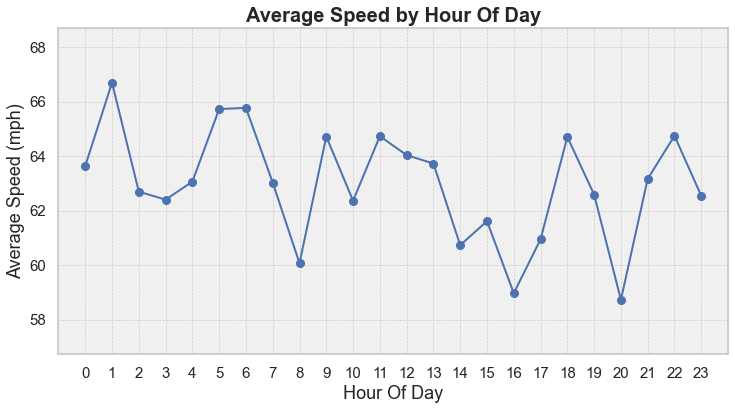

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.set(style='whitegrid', context='talk')
plt.gca().set_facecolor('#f0f0f0')  
plt.plot(average_speed['Hour Of Day'], 
         average_speed['Speed'], 
         marker='o', 
         linestyle='-', 
         color='b', 
         markersize=8, 
         linewidth=2)
plt.title('Average Speed by Hour Of Day', fontsize=20, fontweight='bold')
plt.xlabel('Hour Of Day', fontsize=18)
plt.ylabel('Average Speed (mph)', fontsize=18)
plt.xticks(range(0, 24), fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(-1, 24)
plt.ylim(average_speed['Speed'].min() - 2, average_speed['Speed'].max() + 2)
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.show()

### Creating a DataFrame for Speed by Hour

In [5]:
speed_hour = []
import numpy as np

for i in range(len(average_speed) - 1):
    start_hour = average_speed['Hour Of Day'][i]
    end_hour = average_speed['Hour Of Day'][i + 1]
    start_speed = average_speed['Speed'][i]
    end_speed = average_speed['Speed'][i + 1]
    
    for j in np.arange(0.1, 1.0, 0.1):
        new_hour = start_hour + j * (end_hour - start_hour)
        new_speed = (start_speed + end_speed) / 2
        speed_hour.append({'Hour Of Day': new_hour, 'Speed': new_speed})

start_hour = 23
end_hour = 24
start_speed = average_speed['Speed'][22] 
end_speed = 0   

for j in np.arange(0.1, 1.0, 0.1):
    new_hour = start_hour + j * (end_hour - start_hour)
    new_speed = (start_speed + end_speed) 
    speed_hour.append({'Hour Of Day': new_hour, 'Speed': new_speed})

speed_hour.extend(average_speed.to_dict('records'))
speed_hour = pd.DataFrame(speed_hour)
speed_hour = speed_hour.sort_values(by='Hour Of Day').reset_index(drop=True)

print(speed_hour)

     Hour Of Day      Speed
0            0.0  63.635136
1            0.1  65.163773
2            0.2  65.163773
3            0.3  65.163773
4            0.4  65.163773
..           ...        ...
235         23.5  64.744605
236         23.6  64.744605
237         23.7  64.744605
238         23.8  64.744605
239         23.9  64.744605

[240 rows x 2 columns]


# Fuel Consumption Function - Regression
### This section outlines a function for predicting fuel consumption (mpg) using regression analysis.

In [6]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

file_path = r'D:\Uni\Project\PPPP\AUTOMPG.xlsx'
data = pd.read_excel(file_path)

xx = data['weight'] / 1000  # Normalize weight to thousands of kg
yy = data['mpg']

f_values = np.arange(1.5, 3.1, 0.1)
r_squared_adj = []
best_f = None
best_model = None

for f in f_values:
    X_new = xx ** (-f)
    X_model = pd.DataFrame({'const': 1, 'weight_inv': X_new})  
    model = sm.OLS(yy, X_model).fit()
    r_squared_adj.append(model.rsquared_adj)    
    if best_f is None or model.rsquared_adj > best_model.rsquared_adj:
        best_f = f
        best_model = model

print("best_f:", best_f)
intercept = best_model.params['const']
slope = best_model.params['weight_inv']
print(f"Equation: mpg = {intercept:.4f} + {slope:.4f} * (weight)^(-{best_f:.1f})")


best_f: 1.5
Equation: mpg = 7.3515 + 71.6108 * (weight)^(-1.5)



# Diagnostic
### In this section, we will cover the diagnostic process, which is essential for identifying and resolving issues in various contexts, such as software development, data analysis, or system performance.

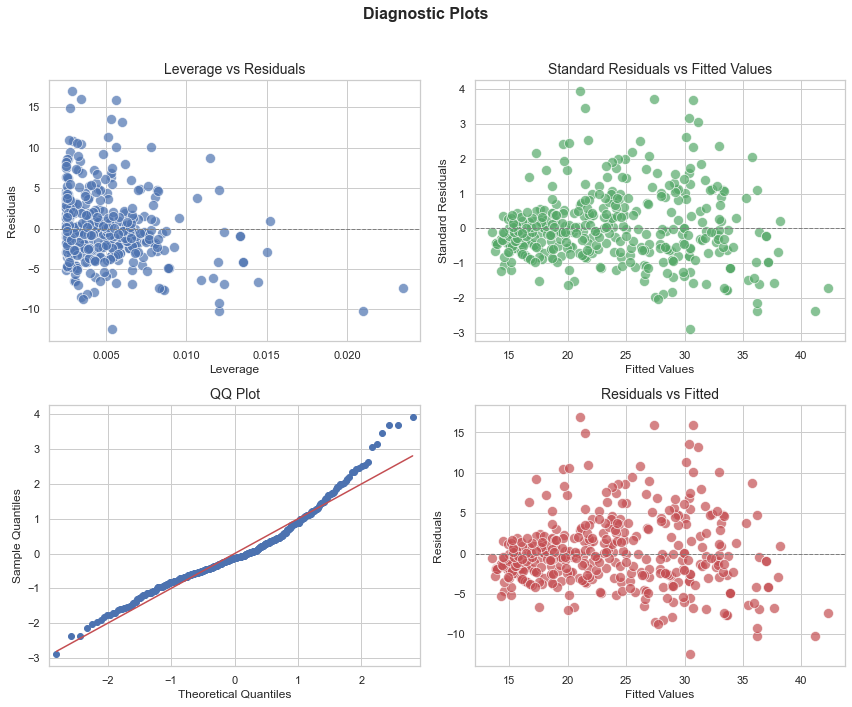

In [7]:

# Diagnostic
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
model_sm = best_model
sns.set(style="whitegrid")

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))

# Leverage vs Residuals
leverage = model_sm.get_influence().hat_matrix_diag
residuals = model_sm.resid
sns.scatterplot(x=leverage, y=residuals, ax=ax1, s=100, alpha=0.7, edgecolor='w', color='b')
ax1.set_xlabel('Leverage', fontsize=12)
ax1.set_ylabel('Residuals', fontsize=12)
ax1.set_title('Leverage vs Residuals', fontsize=14)
ax1.axhline(0, color='grey', linestyle='--', linewidth=1)
ax1.grid(True)

# Standard Residuals vs Fitted Values
std_residuals = model_sm.get_influence().resid_studentized_internal
fitted_values = model_sm.fittedvalues
sns.scatterplot(x=fitted_values, y=std_residuals, ax=ax2, s=100, alpha=0.7, edgecolor='w', color='g')
ax2.set_xlabel('Fitted Values', fontsize=12)
ax2.set_ylabel('Standard Residuals', fontsize=12)
ax2.set_title('Standard Residuals vs Fitted Values', fontsize=14)
ax2.axhline(0, color='grey', linestyle='--', linewidth=1)
ax2.grid(True)

# QQ Plot
sm.qqplot(model_sm.resid, line='s', fit=True, ax=ax3)
ax3.set_title('QQ Plot', fontsize=14)
ax3.grid(True)

# Residuals vs Fitted
sns.scatterplot(x=model_sm.fittedvalues, y=model_sm.resid, ax=ax4, s=100, alpha=0.7, edgecolor='w', color='r')
ax4.set_xlabel('Fitted Values', fontsize=12)
ax4.set_ylabel('Residuals', fontsize=12)
ax4.set_title('Residuals vs Fitted', fontsize=14)
ax4.axhline(0, color='grey', linestyle='--', linewidth=1)
ax4.grid(True)

fig.suptitle('Diagnostic Plots', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96]) 
plt.show()



### These charts indicate a good fit for the regression model, and the deviations in the data are due to outliers, which are not significant.

## Create a function and a DataFrame to call MPG based on weight.

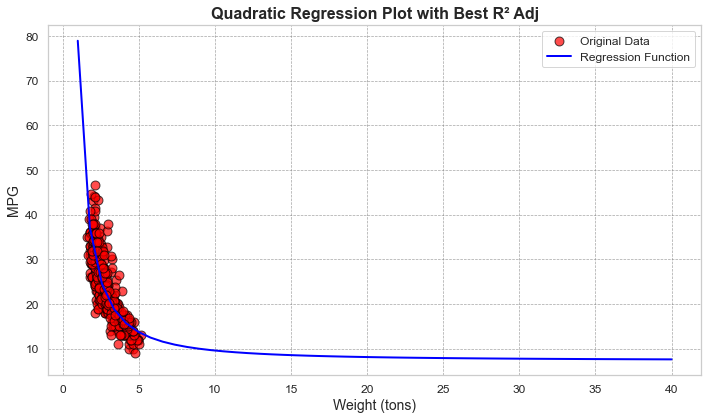

In [8]:
def mpg(weight):
    weight_sq = weight ** (-best_f)
    return best_model.params['const'] + best_model.params['weight_inv'] * weight_sq

weight_range = np.linspace(1, 40)  
predicted_mpg_values = [mpg(weight) for weight in weight_range]

plt.figure(figsize=(10, 6))
plt.scatter(data['weight'] / 1000, yy, color='red', label='Original Data', s=80, alpha=0.7, edgecolor='black')
plt.plot(weight_range, predicted_mpg_values, color='blue', label='Regression Function', linewidth=2)
plt.xlabel('Weight (tons)', fontsize=14)
plt.ylabel('MPG', fontsize=14)
plt.title('Quadratic Regression Plot with Best R² Adj', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.7, alpha=0.7)
plt.legend(fontsize=12, loc='best')
plt.tight_layout()
plt.show()

In [9]:
# mpg data frame
import pandas as pd
import numpy as np

weights = np.arange(10, 20, 0.01)
mpg_values = mpg(weights)
mpg_weight = pd.DataFrame({'weight': weights, 'mpg': mpg_values})

print(mpg_weight)


     weight       mpg
0     10.00  9.616039
1     10.01  9.612646
2     10.02  9.609262
3     10.03  9.605886
4     10.04  9.602519
..      ...       ...
995   19.95  8.155151
996   19.96  8.154547
997   19.97  8.153944
998   19.98  8.153341
999   19.99  8.152740

[1000 rows x 2 columns]


# Use the PuLP library to solve the model.

In [3]:
import pulp
from pulp import LpProblem, LpMinimize, LpVariable, lpSum, value
model = LpProblem("Optimization_Model", LpMinimize)

# variables
X = LpVariable.dicts("X", (range(m), range(m), range(n), range(S)), cat='Binary')
Y = LpVariable.dicts("Y", (range(m), range(n), range(S)), cat='Binary')
V = LpVariable.dicts("V", (range(n), range(S)), cat='Binary')
TL = LpVariable.dicts("TL", (range(m), range(n), range(S)), lowBound=0, cat='Continuous')
WT = LpVariable.dicts("WT", (range(m), range(m), range(n), range(S)), lowBound=0, cat='Continuous')
v = LpVariable.dicts("LC", (range(m), range(S)), lowBound=0, cat='Continuous')


# constraint 1
C1 = lpSum( Pr[s] * V[k][s] * F[k]  for k in range(n) for s in range(S) )

# constraint 2
C2 = lpSum([ Pr[s] * X[i][j][k][s]  * FC * (P1 * d[i][j] / speed_hour.loc[speed_hour['Hour Of Day'] == TL[i][k][s]\
       , 'Speed'].values[0]) / E for i in range(m) for s in range(S) for j in range(1,m) for k in range(1,n)]) + \
           lpSum([ Pr[s] * Y[i][k][s] * FC * P2 * t[i] / E for s in range(S) for i in range(1,m) for k in range(1,n)])

# constraint 3
C3 = lpSum( [ Pr[s] * X[i][j][k][s] * FC * d[i][j] / mpg_weight.loc[mpg_weight['weight'] == (WT[i][j][k][s]), 'mpg'].values[0]\
            for s in range(S) for i in range(m) for j in range(1,m) for k in range(n)])

# constraint 4
C4 = lpSum([ Pr[s] * X[i][j][k][s] * CC * w * ( (P1*(d[i][j] / speed_hour.loc[speed_hour['Hour Of Day'] == TL[i][k][s],\
                  'Speed'].values[0])/E) + \
           d[i][j] / mpg_weight.loc[mpg_weight['weight'] == (WT[i][j][k][s]), 'mpg'].values[0])   
           for i in range(m) for j in range(1,m) for s in range(S) for k in range(n)]) + \
           lpSum([ Pr[s] * Y[i][k][s] * CC * w * (P2 * t[i] / E ) 
           for i in range(1,m) for s in range(S) for k in range(n)])

# constraint 5
C5 = lpSum( Pr[s] * PC * v[i][s]  for s in range(S) for i in range(1,m))

# constraint 6
C6 = lpSum([ Pr[s] * GC *(lpSum([WT[i][j][k][s]  for s in range(S) for j in range(m) ])) * (1- (alpha) ** (-1-t[i])) for i in range(1,m) for s in range(S) for k in range(n)]) \
            + lpSum([ Pr[s] * GC *(lpSum([WT[i][j][k][s]  for s in range(S) for j in range(m)])) *(1- (beta) \
        ** (-1 -d[i][j] / mpg_weight.loc[mpg_weight['weight'] \
            == (WT[i][j][k][s]), 'mpg'].values[0] ))  for s in range(S) for i in range(m) for j in range(m)for k in range(n)])
            
# constraint 7
for s in range(S):
    for i in range(m):
        for k in range(n):
            model += X[i][i][k][s] == 0
            
    # constraint 8
    for i in range(1, m):
        model += lpSum([Y[i][k][s] for k in range(n)]) == 1
        
    # constraint 9
    for k in range(n):
        model += lpSum([q[s][i] * Y[i][k][s] for i in range(1, m)]) <= Q
    
    # constraint 10
    model += lpSum([q[s][i] * Y[i][k][s] for i in range(1, m) for k in range(n)]) == lpSum([q[s][i]  for i in range(1, m)])

    # constraint 11
    for k in range(n):
        model += lpSum([X[0][j][k][s] for j in range(1, m)]) <= 1
        
    # constraint 12
    for k in range(n):
        model += lpSum([X[j][0][k][s] for j in range(1, m)]) <= 1
        
    # constraint 13
    for k in range(n):
        model += lpSum([X[j][0][k][s] for j in range(1, m)]) == lpSum([X[0][j][k][s] for j in range(1, m)])
    
    # constraint 14
    for j in range(1, m):
        model += lpSum(lpSum([X[i][j][k][s] for i in range(m)]) for k in range(n)) <= 1
    
    # constraint 15
    for k in range(n):
        for j in range(1, m):
            model += lpSum([X[i][j][k][s] for i in range(m)]) - lpSum([X[j][i][k][s] for i in range(m)]) == 0
    
    # constraint 16
    model += lpSum([lpSum([Y[i][k][s] for k in range(n)]) for i in range(1, m)]) == m-1
    
    # constraint 17
    for k in range(n):
        model += lpSum([X[i][j][k][s] for i in range(m) for j in range(m)]) <= V[k][s] * M
    
    # constraint 18
    for k in range(n):
        model += V[k][s] <= lpSum([X[i][j][k][s] for i in range(m) for j in range(m)])
    
    # constraint 19
    for k in range(n):
        for i in range(1, m):
            model += Y[i][k][s] <= lpSum([X[i][j][k][s] for j in range(m)])
    
    # constraint 20
    for i in range(1,m):
        model += lpSum([TL[i][k][s] for k in range(n)]) - t[i] - MAT[i] <= v[i][s]
    
    # constraint 21
    for k in range(n):
        model += TL[0][k][s] == 0
        
    # constraint 22
    for k in range(n):
        for j in range(1,m):
            for i in range(m):
                model += TL[j][k][s] <= X[i][j][k][s] * (d[i][j] / speed_hour.loc[speed_hour['Hour Of Day']\
                == TL[i][k][s], 'Speed'].values[0] + t[j]) + TL[i][k][s] + M * (1-X[i][j][k][s]) 
    
    # constraint 23
    for k in range(n):
        for j in range(1, m):
            for i in range(m):
                model += TL[j][k][s] >= X[i][j][k][s] * (d[i][j] / speed_hour.loc[speed_hour['Hour Of Day'] \
                 == TL[i][k][s], 'Speed'].values[0] + t[j]) + TL[i][k][s] - M * (1-X[i][j][k][s])
                      
    # constraint 24
    for k in range(n):
        for j in range(1,m):
            model += TL[j][k][s] +  X[j][0][k][s] *  d[j][0] / speed_hour.loc[speed_hour['Hour Of Day'] \
                  == TL[j][k][s], 'Speed'].values[0] <= lpSum([Y[i][k][s] *t[i] \
                        for i in range(1,m)]) + lpSum([X[i][j][k][s] \
                        * (d[i][j] / speed_hour.loc[speed_hour['Hour Of Day'] == TL[i][k][s], 'Speed'].values[0])\
                            for i in range(m) for j in range(m)]) + M*(1-X[j][0][k][s]) 
    
    # constraint 25                                                  
    for k in range(n):
        for j in range(1,m):
            model += TL[j][k][s] +  X[j][0][k][s] * d[j][0] / speed_hour.loc[speed_hour['Hour Of Day'] \
                    == TL[j][k][s], 'Speed'].values[0] >= lpSum([Y[i][k][s] *t[i] \
                        for i in range(1,m)]) + lpSum([X[i][j][k][s] \
                        * (d[i][j] / speed_hour.loc[speed_hour['Hour Of Day'] == TL[i][k][s], \
                    'Speed'].values[0]) for i in range(m) for j in range(m)]) -  M*(1-X[j][0][k][s]) 
    
    # constraint 26
    for k in range(n):
        for i in range(1, m):
            model += WT[0][i][k][s] == X[0][i][k][s] * (Q + tw)
    
    # constraint 27
    for k in range(n):
        for j in range(m):
            for i in range(1,m):
                model += WT[i][j][k][s] <= X[i][j][k][s] * M  
                
    # constraint 28
    for j in range(m):
        for i in range(1,m):
            for k in range(n):      
                model += WT[i][j][k][s] <= lpSum([WT[j][i][k][s] for j in range(m)]) - q[s][i] * Y[i][k][s] + M*(1-X[i][j][k][s])
                
    # constraint 29
    for j in range(m):
        for i in range(1,m):
            for k in range(n):      
                model += WT[i][j][k][s] >= lpSum([WT[j][i][k][s] for j in range(m)]) - q[s][i] * Y[i][k][s] - M*(1-X[i][j][k][s])
      
    # constraint 30
    for k in range(n):
        model += lpSum([X[0][j][k][s] for j in range(1, m)]) == V[k][s]



# Objective function
model += C1 + C2 + C3 + C4 + C5 + C6, "Total_Cost"


# Solver
import time
start_time = time.time()
model.solve(pulp.PULP_CBC_CMD(timeLimit=18000))





Welcome to the CBC MILP Solver 
Version: 2.9.0 
Build Date: Feb 12 2015 

command line - C:\Users\Mehrzad\anaconda3\lib\site-packages\pulp\apis\..\solverdir\cbc\win\64\cbc.exe C:\Users\Mehrzad\AppData\Local\Temp\dc2e6ff0431645f08048c54c9c49a748-pulp.mps sec 18000 branch printingOptions all solution C:\Users\Mehrzad\AppData\Local\Temp\dc2e6ff0431645f08048c54c9c49a748-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 24893 COLUMNS
At line 331094 RHS
At line 355983 BOUNDS
At line 361264 ENDATA
Problem MODEL has 24888 rows, 10600 columns and 284320 elements
Coin0008I MODEL read with 0 errors
seconds was changed from 1e+100 to 18000
Continuous objective value is 3585.49 - 0.23 seconds
Cgl0002I 440 variables fixed
Cgl0003I 0 fixed, 0 tightened bounds, 916 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 548 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 423 strengthened rows, 0 substitutions
Cgl0003I 0 fixed,

# results
### decision variables

In [11]:
for i in range(m):
    for j in range(m):
        for k in range(n):
            for s in range(S):
                if X[i][j][k][s].varValue > 0:
                    print(f"X[{i}][{j}][{k}][{s}] = {X[i][j][k][s].varValue}")

for i in range(m):
    for k in range(n):
        for s in range(S):
            if  Y[i][k][s].varValue is not None and Y[i][k][s].varValue > 0:
                print(f"Y[{i}][{k}][{s}] = {Y[i][k][s].varValue}")

for k in range(n):
    for s in range(S):
        if V[k][s].varValue > 0:
            print(f"V[{k}][{s}] = {V[k][s].varValue}")

for i in range(m):
    for k in range(n):
        for s in range(S):
            if TL[i][k][s].varValue > 0:
                print(f"TL[{i}][{k}][{s}] = {TL[i][k][s].varValue}")

for i in range(m):
    for j in range(m):
        for k in range(n):
            for s in range(S):
                if WT[i][j][k][s].varValue > 0:
                    print(f"WT[{i}][{j}][{k}][{s}] = {WT[i][j][k][s].varValue}")

for i in range(m):
    for s in range(S):
        if v[i][s].varValue is not None and v[i][s].varValue > 0:
            print(f"v[{i}][{s}] = {v[i][s].varValue}")




X[0][1][0][0] = 1.0
X[0][1][5][2] = 1.0
X[0][2][0][1] = 1.0
X[0][3][4][3] = 1.0
X[0][4][0][3] = 1.0
X[0][4][1][1] = 1.0
X[0][4][5][0] = 1.0
X[0][4][7][2] = 1.0
X[0][5][7][3] = 1.0
X[0][6][3][1] = 1.0
X[0][6][6][0] = 1.0
X[0][6][6][2] = 1.0
X[0][7][0][2] = 1.0
X[0][9][6][3] = 1.0
X[0][9][7][0] = 1.0
X[0][9][7][1] = 1.0
X[1][0][0][1] = 1.0
X[1][2][0][0] = 1.0
X[1][2][5][2] = 1.0
X[1][2][7][3] = 1.0
X[2][0][0][0] = 1.0
X[2][0][5][2] = 1.0
X[2][0][7][3] = 1.0
X[2][1][0][1] = 1.0
X[3][5][1][1] = 1.0
X[3][5][5][0] = 1.0
X[3][5][7][2] = 1.0
X[3][10][4][3] = 1.0
X[4][3][1][1] = 1.0
X[4][3][5][0] = 1.0
X[4][3][7][2] = 1.0
X[4][6][0][3] = 1.0
X[5][0][1][1] = 1.0
X[5][0][5][0] = 1.0
X[5][0][7][2] = 1.0
X[5][1][7][3] = 1.0
X[6][7][0][3] = 1.0
X[6][7][6][0] = 1.0
X[6][8][3][1] = 1.0
X[6][8][6][2] = 1.0
X[7][0][0][3] = 1.0
X[7][10][0][2] = 1.0
X[7][10][6][0] = 1.0
X[7][10][7][1] = 1.0
X[8][0][3][1] = 1.0
X[8][0][6][2] = 1.0
X[8][0][6][3] = 1.0
X[8][0][7][0] = 1.0
X[9][0][0][2] = 1.0
X[9][7][7][1] =

### Costs

In [16]:
C1_value = C1.value()
C2_value = C2.value()
C3_value = C3.value()
C4_value = C4.value()
C5_value = C5.value()
C6_value = C6.value()

print("Objective Function Value= ", pulp.value(model.objective))
print(f"C1= {C1_value}")
print(f"C2= {C2_value}")
print(f"C3= {C3_value}")
print(f"C4= {C4_value}")
print(f"C5= {C5_value}")
print(f"C6= {C6_value}")


Objective Function Value = 6271.4193239902371
C1= 768.5000000000001
C2= 690.4668189893814
C3= 2965.3618974141928
C4= 602.0195914334953
C5= 265.74164649999994
C6= 979.329369653168



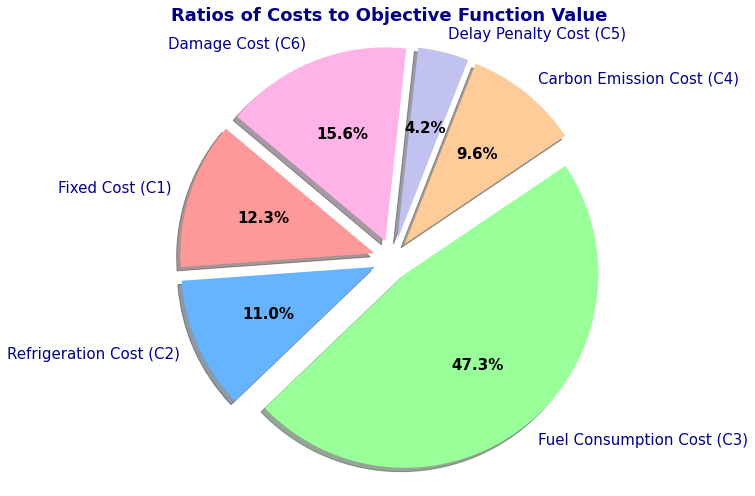

In [11]:
import matplotlib.pyplot as plt

objective_value = 6271.4193239902371
costs = {
    'Fixed Cost (C1)': 768.5000000000001,
    'Refrigeration Cost (C2)': 690.4668189893814,
    'Fuel Consumption Cost (C3)': 2965.3618974141928,
    'Carbon Emission Cost (C4)': 602.0195914334953,
    'Delay Penalty Cost (C5)': 265.74164649999994,
    'Damage Cost (C6)': 979.329369653168
}

ratios = {key: value / objective_value for key, value in costs.items()}
plt.figure(figsize=(10, 7))
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6']
explode = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1]  # Slightly separate all slices

wedges, texts, autotexts = plt.pie(ratios.values(), labels=ratios.keys(), autopct='%1.1f%%', startangle=140,
                                    colors=colors, shadow=True, explode=explode)

for text in texts:
    text.set_fontsize(15)
    text.set_color('darkblue')
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(15)
    autotext.set_weight('bold')

plt.title('Ratios of Costs to Objective Function Value', fontsize=18, fontweight='bold', color='navy')
plt.axis('equal') 
plt.grid(False)
plt.tight_layout() 
plt.show()

# The obtained paths

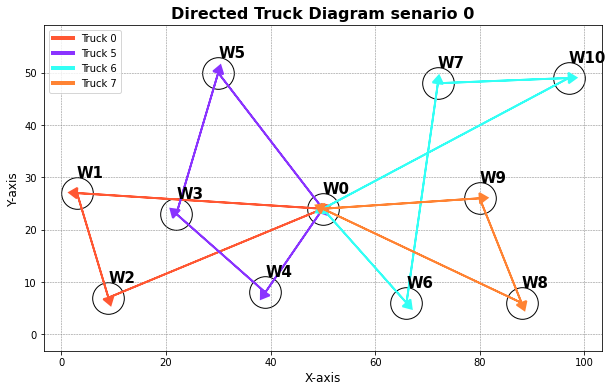

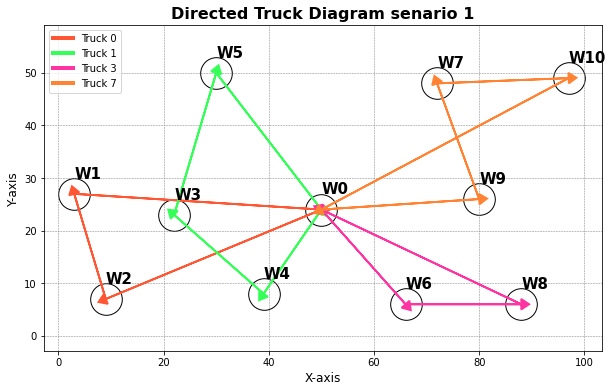

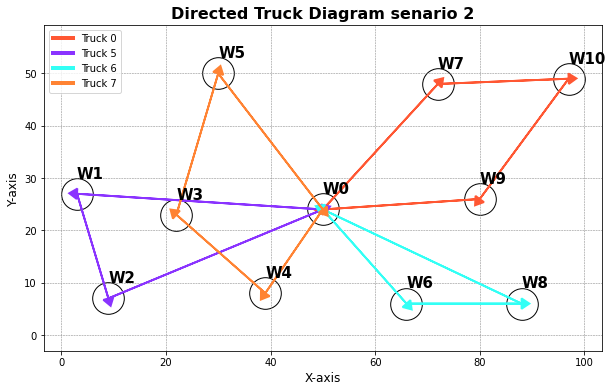

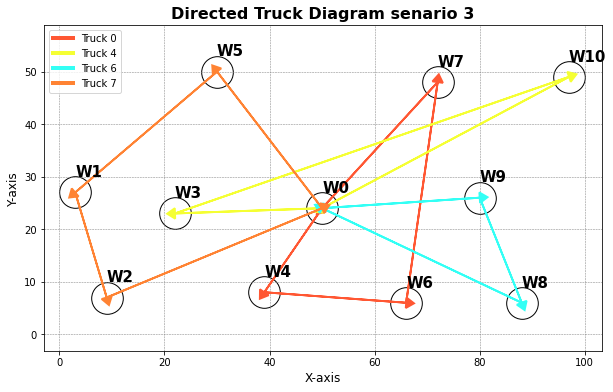

In [37]:
import matplotlib.pyplot as plt
import numpy as np

for s in range(S):
    edges = {k: [] for k in range(n)} 
    for i in range(m):
        for j in range(m):
            for k in range(n):
                if X[i][j][k][s] == 1:
                    edges[k].append((i, j))  
    
    colors = ['#FF5733', '#33FF57', '#3357FF', '#FF33A1', '#F5FF33', '#8A33FF', '#33FFF5', '#FF8333', '#004D00']
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, color='white', s=1000, edgecolor='black', zorder=0)
    for k in range(n):
        if V[k][s] == 1:
            plt.plot([], [], color=colors[k % len(colors)], label=f'Truck {k}', lw=4)
    
    for k, pairs in edges.items():
        for i, j in pairs:
            plt.arrow(x[i], y[i], x[j] - x[i], y[j] - y[i],
                      head_width=2, head_length=1.5,
                      fc=colors[k % len(colors)], ec=colors[k % len(colors)],
                      linewidth=1.9, zorder=10)

    for idx, (xi, yi) in enumerate(zip(x, y)):
        plt.text(xi , yi + 3, f'W{idx}', fontsize=15, ha='left', fontweight='bold', zorder=1000)  # Adjust the offsets as needed
    plt.legend()
    plt.xlabel('X-axis', fontsize=12)
    plt.ylabel('Y-axis', fontsize=12)
    plt.title('Directed Truck Diagram 'f'senario {s}''', fontsize=16, fontweight='bold')
    plt.grid(color='gray', linestyle='--', linewidth=0.5)
    plt.axis('equal')  
    plt.show()

# Analyze the results

### Since the problem is NP-hard, we ran the code for up to 5 hours, and the solutions obtained at different seconds are evident. 

### we will analyze the results using regression.

In [38]:
import re
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

file_path = r'D:\Uni\Project\PPPP\result2.txt'

with open(file_path, 'r', encoding='utf-8') as file:
    text = file.read()

matches = re.findall(r'([\d.]+) best solution.*\(([\d.]+) seconds\)', text)
df = pd.DataFrame(matches, columns=['Best Solution', 'Seconds'])
df['Best Solution'] = df['Best Solution'].astype(float)
df['Seconds'] = df['Seconds'].astype(float)


## Finding a regression model to explain the results obtained at different times.

In [39]:
best_r_squared_adjusted = -np.inf
best_t = None
r_squared_adjusted_list = []
t_values = np.arange(0.1, 5.1, 0.1)

for t in t_values:
    X = 1 / (df[['Seconds']] ** t)
    y = df['Best Solution']

    model = LinearRegression()
    model.fit(X, y)
    
    y_pred = model.predict(X)
    
    n = len(y)
    p = X.shape[1]
    
    r_squared = model.score(X, y)
    r_squared_adjusted = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)
    
    r_squared_adjusted_list.append(r_squared_adjusted)
    
    if r_squared_adjusted > best_r_squared_adjusted:
        best_r_squared_adjusted = r_squared_adjusted
        best_t = t
        best_model = model 

intercept = best_model.intercept_
slope = best_model.coef_[0]


print("Best t:", best_t)
print("Best R² Adjusted:", best_r_squared_adjusted)
print(f"Equation: Best Solution = {intercept:.4f} + {slope:.4f} * (Seconds)^(-{best_t:.1f})")

Best t: 0.4
Best R² Adjusted: 0.8749218148117383
Equation: Best Solution = 6158.4870 + 3894.9576 * (Seconds)^(-0.4)


### Adjusted R² for Different t Values

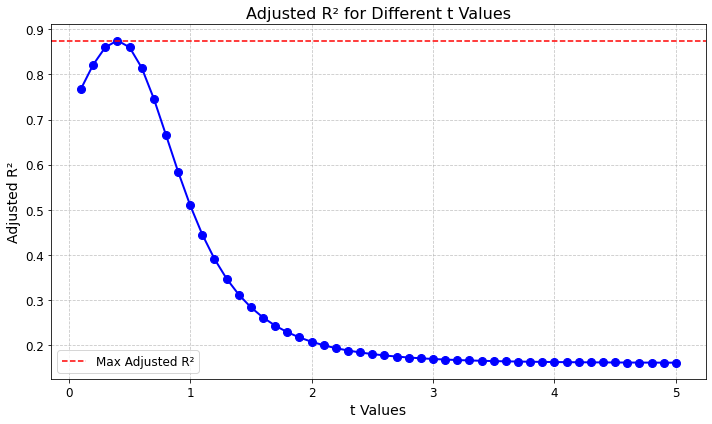

In [40]:
plt.figure(figsize=(10, 6))
plt.plot(t_values, r_squared_adjusted_list, marker='o', linestyle='-', color='blue', markersize=8, linewidth=2)
plt.xlabel('t Values', fontsize=14)
plt.ylabel('Adjusted R²', fontsize=14)
plt.title('Adjusted R² for Different t Values', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.axhline(y=max(r_squared_adjusted_list), color='red', linestyle='--', label='Max Adjusted R²')
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

## Scatter plot of the best solution and the fitted function.

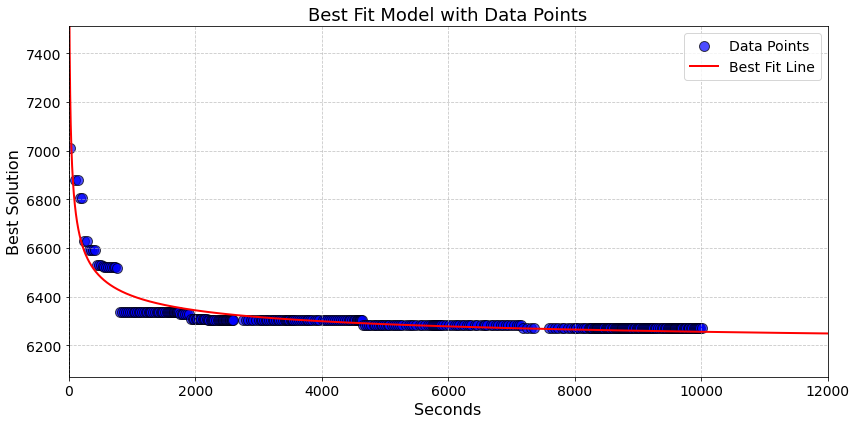

In [44]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(12, 6))
plt.scatter(df['Seconds'], df['Best Solution'], color='blue', label='Data Points', alpha=0.7, edgecolor='black', s=100)
X_best = 1 / (np.arange(1, 50000) ** best_t).reshape(-1, 1) 
y_best_pred = best_model.predict(X_best)
plt.plot(np.arange(1, 50000), y_best_pred, color='red', label='Best Fit Line', linewidth=2)
plt.xlabel('Seconds', fontsize=16)
plt.ylabel('Best Solution', fontsize=16)
plt.title('Best Fit Model with Data Points', fontsize=18)
plt.xlim(0, 12000)  
plt.ylim(min(df['Best Solution'])-200, max(df['Best Solution'])+500)  
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.axhline(y=0, color='black', linewidth=0.8, linestyle='--')
plt.axvline(x=0, color='black', linewidth=0.8, linestyle='--')
plt.legend(fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()  
plt.show()

